# Capítulo 4: treinando modelos

## Modelo de regressão linear

Vamos discutir regressão linear em 2 formas:

* pela fórmula fechada dos mínimos quadrados
* por abordagem de otimização (gradient discent)

## Regressão linear

### modelo linear

Um modelo linear obedece a fórmula
$$ŷ = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... ++ \theta_nx_n$$
Em que:
* $ŷ$ é o valor predito (1 x 1)
* $n$ o número de features (dimensão do nosso espaço) 
* $x_i$ é a i-ésima features
* $\theta_i$ é o i-ésimo parâmetro do modelo (o que queremos treinar)

Ou, em forma vetorial:
$$ŷ = h_\theta (\pmb x) = {\theta}^{T}\cdot \pmb x$$
em que:
* $\theta$ é o vetor de parâmetros (n x 1)
* $\pmb x$ é o vetor coluna de features sendo $x_0 = 1$ (n x 1)
* $h_\theta$ é a função de hipótese usando o vetor de parâmetro $\theta$

### Como treiná-lo?

Para treinar um modelo linear basta acharmos os melhores valores para cada $\theta_i$ que fazem a função $ h_\theta$ errar menos nos dados de treino.

Para isso a gente precisa de uma **MÉTRICA** ou medidor de performance. Sabemos que uma métrica comum de performance de modelos linear é a a raiz da média dos erros quadráticos, mas como minimizar a raiz é igual a minimizar seu interior, nossa métrica será a média dos erros quadráticos (MSE: MEAN SQUARE ERROR)

$$ MSE(\pmb X, h_\theta) = \frac{1}{m}\sum_{i=1}^m{(\theta^{T} \cdot \pmb{x^{(i)}} - y^{(i)})^{2}}$$

A fórmula assusta? Assusta! MAS ela nada mais é do que a média dos m erros. Cada erro é a diferença entre o previsto e o real para cada um dos m pontos.

$$
    \pmb X = \begin{bmatrix}
        \pmb x^{(1)} \\
        \pmb x^{(2)} \\
        \vdots  \\
        \pmb x^{(m)}
    \end{bmatrix}
$$

Onde cada $x^{(i)}$ é um vetor linha

Perceba que agora temos $\pmb X$ maiúsculo e negrito, isso significa que é uma matriz. nela, cada linha representa um ponto no nosso espaço n-dimensional. É uma matriz com m linhas (número de pontos) e n colunas (número de features). (m x n)

#### Equação normal

É a solução analítica da minimização da fórmula do MSE mostrada acima. Basta derivar, igualar a zero e resolver, lembrando que $\theta$ é a nossa variável.

$$ \hat{\theta} = (\pmb X ^{T} \cdot \pmb X) ^ {-1} \cdot \pmb X ^ {T} \cdot \pmb y$$

* $\hat \theta$ é o valor de $\theta$ que minimiza a **função de custo**
* $\pmb y$ é o vetor de targets 


Acredite ou não, essa fórmula resolve nosso problema e resulta em um vetor coluna para $\hat \theta$

### Vamos gerar dados e testar!!!
geramos y como uma função linear de x:

$$ y = 4 + 3x + E $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = 2 * np.random.rand(100, 1)
y = 4 + (3 * x) + np.random.randn(100, 1)

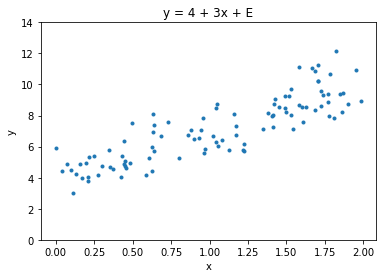

In [2]:
plt.plot(x, y, '.')
plt.ylabel('y')
plt.xlabel('x')
plt.title('y = 4 + 3x + E')
plt.ylim([0, 14])
plt.show()

Agora vamos calcular $\theta$ usando a equação normal!

lembrem que $\pmb x$ precisa ter $x_0 = 1$ ! esse é o nosso termo de BIAS ou coeficiente linear. Assim, é isso que as linhas abaixo estão fazendo, adicionando o termo $x_0$ no nosso vetor de samples para cada sample!

In [3]:
X_bold = np.c_[np.ones((100, 1)), x] 

print('antes: \n\n', x[0:5], '\n')
print('depois: \n\n', X_bold[0:5])

antes: 

 [[0.19946433]
 [1.60186827]
 [0.42631156]
 [1.37963793]
 [1.72733331]] 

depois: 

 [[1.         0.19946433]
 [1.         1.60186827]
 [1.         0.42631156]
 [1.         1.37963793]
 [1.         1.72733331]]


### Calculando theta

In [4]:
theta_best = np.linalg.inv(
    X_bold.T.dot(X_bold)
    ).dot(X_bold.T).dot(y)


print('melhor theta:\n\n', theta_best)
print('\ntheta0 = ', theta_best[0][0],  '\ntheta1 = ', theta_best[1][0])

melhor theta:

 [[3.9544304 ]
 [3.03088962]]

theta0 =  3.9544304036863345 
theta1 =  3.030889621558711


### Previsões!

Agora que temos um modelo, podemos fazer previsões para dados nunca antes vistos. lembrem: $$\hat y = \theta ^ {T} \cdot \pmb x$$

Vamos criar os pontos x = 0 e x = 2 para desenhar a reta de previsão e, finalmente, traçá-la

In [5]:
x_new = np.array(
    [[0],
     [2]]
)

In [6]:
X_bold_new = np.c_[np.ones((2,1)), x_new]
y_predicted = X_bold_new.dot(theta_best)


print('predicted y:\n\n', y_predicted)

predicted y:

 [[ 3.9544304 ]
 [10.01620965]]


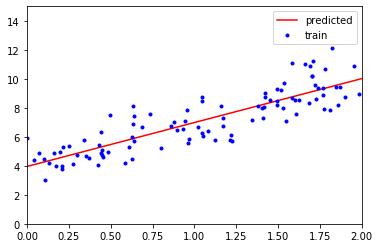

In [7]:
plt.plot(x_new, y_predicted, 'r-')
plt.plot(x, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.legend(['predicted', 'train'])
plt.show()

### Muito complicado o processo para uma simples regressão linear, não é? Agora vamos mostrar como se faz isso na vida real:

In [8]:
# Import do modelo
from sklearn.linear_model import LinearRegression

# Instanciamento do modelo
lin_reg = LinearRegression()

# Fit/Ajuste do modelo
lin_reg.fit(x, y)

# Predição
y_pred = lin_reg.predict(x_new)

print('sklearn theta:')
print(lin_reg.intercept_,'\n',lin_reg.coef_[0])
print('\nour theta:')
print(theta_best)
print('\nsklearn predict:')
print(y_pred)
print('\nour predict:')
print(y_predicted)

sklearn theta:
[3.9544304] 
 [3.03088962]

our theta:
[[3.9544304 ]
 [3.03088962]]

sklearn predict:
[[ 3.9544304 ]
 [10.01620965]]

our predict:
[[ 3.9544304 ]
 [10.01620965]]


## Gradient Descent

É um algorítmo de otimização genérico que consegue achar solução ótima para vários problemas.

A ideia é muito simples: Dada uma função de custo (como RMSE, por exemplo), o algoritmo tenta mudar o vetor de parâmetros $\theta$ com incrementos na direção do gradiente da função de custo.


![](./imgs/gradient_discent)

A ideia é começar o $\theta$ com um chute ou valor aleatório e otimizá-lo ao andar na direção do gradiente

Um parâmetro importante nesse algoritmo é o tamanho dos passos ou *learning rate*

![](./imgs/small_lr.png)

![](./imgs/large_lr.png)

Mínimos locais e patamares são complicadores da técnica

![](./imgs/gd_problems.png)


### Vamos implementar um simples para regressão linear

queremos achar o gradiente da MSE. Para cada $\theta_i$ temos uma derivada parcial dada por:

$$ \frac{\partial{}}{\partial{\theta_j}}MSE(\theta) = \frac{2}{m}\sum_{i=1}^{m}(\theta^{T}\cdot \pmb x^{(i)} - y^{(i)}) \cdot x_j^{(i)}$$


assim, o gradiente é dado por:


$$
 \nabla_{\theta}MSE(\theta) =
 \begin{bmatrix}
        \frac{\partial{}}{\partial{\theta_0}}MSE(\theta) \\
        \frac{\partial{}}{\partial{\theta_1}}MSE(\theta) \\
        \vdots  \\
        \frac{\partial{}}{\partial{\theta_n}}MSE(\theta)
    \end{bmatrix} 
    =
    \frac{2}{m}\cdot \pmb X^{T} \cdot (\pmb X\cdot \theta - \pmb y)
$$

Assim, começando com um theta aleatório, nosso próximo theta deve ser um passo na direção do gradiente. E o *learning rate* é a nossa velocidade!

$$
    \theta^{\ next\ step} = \theta - lr \cdot \nabla_{\theta}MSE(\theta)
$$

### Código de um gradient descent!

In [9]:
lr = 0.2
n_iterations = 200
m = 100
theta_gd = np.random.randn(2,1)

error = np.array([[],[]])

for it in range(n_iterations):
    gradient = 2/m * X_bold.T.dot(X_bold.dot(theta_gd) - y)
    theta_gd = theta_gd - lr * gradient
    error = np.append(error, theta_best - theta_gd, axis = 1)

### Gráfico do erro ao longo das iterações

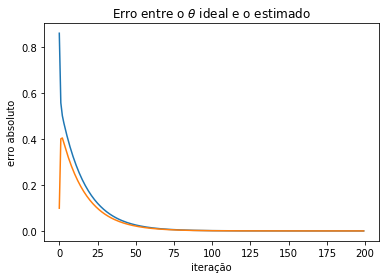

In [10]:
plt.plot(abs(error[0]))
plt.plot(abs(error[1]))
plt.title(r'Erro entre o $\theta$ ideal e o estimado')
plt.ylabel('erro absoluto')
plt.xlabel('iteração')
plt.show()

## Stochastic Gradient Descent

Um dos grandes problemas do Gradient Descent tradicional é que ele usa todo o dataset a cada iteração.

De maneira completamente oposta, o Stochastic Gradient Descent usa apenas 1 instância aleatória por iteração. Assim ele vai melhorando o erro em relação ao parâmetro ótimo, mas de uma maneira muito mais caótica.

### implementação:

In [11]:
n_epochs = 50

t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta_sgd = np.random.randn(2,1)
error = np.array([[],[]])

for epoch in range(n_epochs):
    for i in range(m):
        random_idx = np.random.randint(m)
        xi = X_bold[random_idx : random_idx + 1]
        yi = y[random_idx : random_idx + 1]
        gradient = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)
        lr = learning_schedule(epoch * m + i)
        theta_sgd = theta_sgd - lr * gradient

        error = np.append(error, theta_best - theta_sgd, axis = 1)

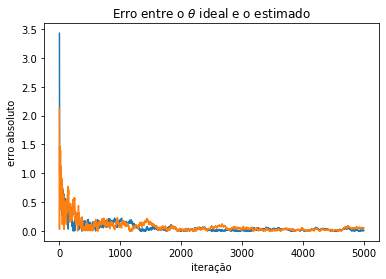

In [12]:
plt.plot(abs(error[0]))
plt.plot(abs(error[1]))
plt.title(r'Erro entre o $\theta$ ideal e o estimado')
plt.ylabel('erro absoluto')
plt.xlabel('iteração')
plt.show()

## Mini-batch Gradient Descent

Último algoritmo de descida de gradiente. Basicamente, ao invés de treinar sobre todo o dataset ou sobre apenas um ponto aleatório por iteração, treinamos sobre um mini-batch (alguns pontos aleatórios)!

-> sklearn SGDregressor

## Regressão polinomial

Suponha que você tem uma equação como:

$$ y = ax^2 + bx + c $$

Se você fizer $x_1 = x$ e $x_2 = x^2$, podemos escrever

$$ y = ax_2 + bx_1 + c $$

que é uma equação linear!

Assim, todo polinômio pode ser *fitado* com uma regressão linear múltipla simples!

Para gerar esses $x_1$ e $x_2$ nós usamos o preprocessamento PolynomialFeatures que cria as potências e as combinações delas! (se passarmos 'a' e 'b', por exemplo, o termo 'ab' também é calculado)
### exemplo:

In [13]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

In [14]:
from sklearn.preprocessing import PolynomialFeatures

PF = PolynomialFeatures(degree = 2, include_bias = False)

x_poly = PF.fit_transform(x)
reg = LinearRegression()
reg.fit(x_poly, y)

pass

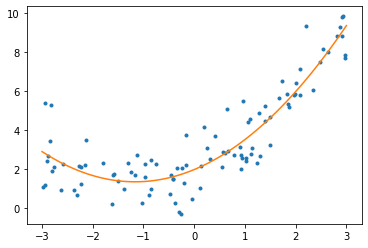

In [15]:
temp = np.linspace(-3,3,100).reshape(100,1)
temp_poly = PF.fit_transform(temp)

plt.plot( x, y, '.')
plt.plot(temp, reg.predict(temp_poly))
plt.show()

## Learning curves

**Primeiro:** o por quê escolher o polinômio de grau correto.

![](./imgs/polys.png)

### RMSE por número de dados de treino

#### underfitting

Com menos dados que grau o polinônimo consegue fitar perfeitamente, explicando o início da curva de treino. Com a adição de dados o erro tende a ficar constante. O erro do teste é normalmente maior que o do treino. Essa é uma curva característica do underfitting. Ambas chegaram a um patamar, estão próximas mas o erro é alto.

![](./imgs/learningc.png)


#### overfitting

O erro no treino é muito menor e há um gap entre as curvas.

![](./imgs/overfitting.png)


## Bias / Variance Tradeoff

O erro provém de 3 partes na estatística/ML:

---------------------------------------

### Bias

Esse erro vem de premissas errôneas! Como achar que uma relação é linear quando ela é, na verdade, cúbica

### Variance

Esse erro vem da sensibilidade excessiva do modelo a pequenas variações no dataset de treino. Um modelo com muitos graus de liberdade acaba tendo muita variância e overfittando os dados de treino.

### Irreducible error

Ruído branco dos dados. A única forma de retirar é limpando os dados.

---------------------------------------

Aumentar a complexidade de um modelo vai frequentemente aumentar a variância e reduzir o viés (bias). E vice versa.




## Modelos lineares regularizados

### Ridge Regression

É adicionado um termo na função de custo:

$$ J(\theta) = MSE(\theta) + \alpha \frac{1}{2} \sum_{i=1}^{n}\theta_i^2 $$

* note que $\theta_0$ não é regularizado
* $\alpha \to \infty$  $\implies$  $\theta_i \to  0 $

![](./imgs/ridge.png)

### Lasso Regression

$$ J(\theta) = MSE(\theta) + \alpha  \sum_{i=1}^{n}|\theta_i| $$

* Tende a eliminar pesos de features não importantes. É uma feature selection natural. Facilmente dá peso zero para features.

![](./imgs/lasso.png)

## Early stopping

Aquele ditado: parar no auge

![](./imgs/earlystopping.png)


## Logistic Regression

Algumas regressões podem ser usadas como classificação (e vice versa). A regressão logistica é usada para calcular a probabilidade de uma instância pertencer a uma determinada classe. threshold = 50%. É um classificador binário.

### Estimando probabilidades

Basicamente aplica-se uma função logística sobre a soma ponderada da regressão linear:

$$
\hat p = h_\theta(\pmb x) = \sigma(\theta^{T} \cdot \pmb x)
$$

onde $\sigma$ é a função sigmoid que 'cospe' um número entre 0 e 1.

$$
 \sigma(t) = \frac{1}{1 + e^{-t}}
$$

Basicamente, o produto $\theta^{T} \cdot \pmb x$ vai resultar em um número real qualquer que vai ser transformado para um número real entre 0 e 1 pela função sigmoid

### Treino e função de custo
função de custo para uma simples instância:

se $y = 1$:
* $ c(\theta) = -log(\hat p)$

se $y = 0$:
* $ c(\theta) = -log(1 - \hat p)$

Generalizando para todas as instâncias, a função de custo final, chamada de log loss, é:

----

$$
J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}[y^{(i)}log(\hat p^{(i)}) + (1 - y^{(i)})log(1 - \hat p^{(i)})]
$$

----

A notícia ruim é que não existe fórmula fechada que minimiza a função :( ... A boa é que a função é convexa e gradient descent garantidamente encontra seu mínimo global! A derivada parcial para cada $\theta_j$ é dada por:

$$
\frac{\partial{}}{\partial \theta_j} J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(\sigma (\theta^T \cdot \pmb x^{(i)}) - y^{(i)})x_j^{(i)}
$$

## Decision boundaries

In [16]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris['data'][:, 3:] # petal width
y = (iris['target'] == 2).astype(np.int) # 1 if iris-virginica, else 0 

In [17]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

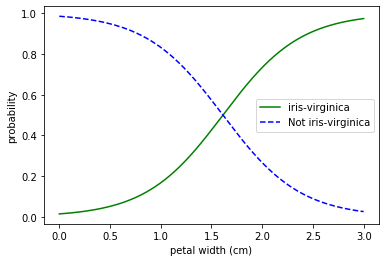

In [22]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label = 'iris-virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label = 'Not iris-virginica')
plt.legend()
plt.ylabel('probability')
plt.xlabel('petal width (cm)')
plt.show()

Em geral, existe um limiar de decisão para separar duas classes. Nesse caso está em torno dos 1.5~1.6. Esse é um limiar 0-dimensional

limiar 1-D:

Cada reta demarca a certeza sobre a decisão

![](./imgs/limiarlinear.png)

### Softmax regression

O modelo de regressão logística pode lidar com várias classes diretamente (sem uso de OvO ou OvA). Isso é chamado de *softmax regression ou regressão logistica multinomial*

A ideia é simples. Temos uma instância $\pmb x$, o modelo primeiramente calcula um score $s_k(\pmb x)$ para cada classe K e depois estima a probabilidade de cada classe usando a função softmax (chamada também de exponencial normalizada) para os scores. O cálculo de $s_k(\pmb x)$ parece familiar?

$$ s_k(\pmb x) = \theta_k^T\cdot \pmb x$$

Cada classe tem seu vetor de pesos $\theta_k$. Todos esses vetores são tipicamente guardados em uma matriz de parâmetros $\Theta$.

Uma vez que você computou todos os scores $s_k(\pmb x)$ para todas as classes, a probabilidade de sua instância ser de uma classe k é:

$$
\hat p_k = \sigma(\pmb s(\pmb x))_k = \frac{exp(s_k(\pmb x))}{\sum_{j=1}^K exp(s_j(\pmb x))}
$$

* K é o número de classes
* $\pmb s(\pmb x)$ é o vetor de scores de $\pmb x$ para cada classe
* $\sigma(\pmb s(\pmb x))_k$ é a probabilidade estimada de $\pmb x$ pertender a classe k.

Só pode ser usado para classes mutuamente exclusivas

O que usar como função de custo? função para minimizar?

Cross entropy cost function:

$$
J(\Theta) = - \frac{1}{m}\sum_{i=1}^m\sum_{k=1}^K y_k^{(i)}log(\hat p_k^{(i)})
$$

* $y_k^{(i)}$ é 1 se a classe da i-ésima instância for k. Se não, é 0.
* A função é zero se a predição for perfeita
* A log loss é o caso particular dessa função quando K = 2

O gradiente dessa função é conhecido:

$$
\nabla_{\theta_k}J(\Theta) = \frac{1}{m}\sum_{i=1}^m(\hat p_k^{(i)} - y_k^{(i)})\pmb x^{(i)}
$$


Vamos usar Softmax para classificar as flores em 3 classes

In [23]:
X = iris['data'][:, (2,3)]
y = iris['target']

In [24]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

![](./imgs/softmax.png)

exercises:

1. linear regression para milhoes de features?

 r:  qualquer GD, mas batch GD só rola se couber na memória. Não rola equação normal pq escala muito rápido em complexidade.

2. Features com diferentes escalas, quem algoritmo sofre com isso? e como? o que pode ser feito em relação a isso?

 r:  Gradient descent. Sofre pois alonga-se uma dimensão, tornando o gradiente menos inclinado e demorando mais para otimizar. Podemos padronizar os dados!

3. Gradient descent pode ficar preso em um mínimo local durante a otimização de uma regressão logística?

 r: Não, pois a função de custo é uma função convexa

4. Todos os algoritmos de descida de gradiente chegam ao mesmo lugar se você deixá-lo rolar por tempo o suficiente?

 r: Não, alguns são estocásticos e, a depender do learning rate alguns nem se quer convergem.

5. usando batch GD você percebe que o erro de validação está subindo. O que está acontecendo? Como consertar isso?

 r: Provavelmente está rolando overfitting. Pode-se regularizar o modelo, usar um modelo menos complexo... Outra possibilidade é um learning rate muito alto, fazendo o modelo divergir

6. É uma boa ideia parar um mini-batch GD imediatamente após uma piora na validação?

 r: Não. Como o algorítmo vai treinando aos poucos, alguns mini batches podem ser exemplos de dados ruins e piorar a validação por algumas poucas iterações. Em geral a resposta é não pois a validação pode voltar a descer.

7. Qual GD é mais rápido? qual converge de verdade? Como fazer os outros convergirem também?

 r: 
   * rápido: stochastic
   * converge: batch
   * limitando iterações, usando schedules

8. Com regressão polinomial você chega em um largo gap entre as curvas de treino e validação. O que tá rolando? Como resolver?

 r: Overfitting. Se resolve mudando o modelo, colocando mais dados no treino ou regularizando o modelo.

9. Você está usando Ridge regression e percebe que os erros de treino e teste estão muito altos. O modelo sofre de muito viés ou muita variância? Você deve aumentar ou diminuir o hiperparâmetro de regularização?

 r: Viés. Modelos muito enviesados tendem a underfittar os dados. Deve-se diminuir o hiperparâmetro de regularização.

10.
 
  * Por que usar ridge ao invés de linear normal?

  * Por que usar Lasso ao invés de ridge?  
  
  * Por que usar Elastic Net ao invés de lasso?

  r:

  * ridge é regularizado e evita overfittings

  * Lasso faz feature selection

  * Net é melhor que lasso desde que lasso pode zoar as coisas quando tem-se mais features que instâncias ou quando várias features são correlacionadas.

11. Você quer classificar fotos como internas ou externas e noite ou dia. Você deve implementar 2 regressões logísticas ou um softmax?

 r: 2 regressões logísticas. softmax consegue classificar 1 instância em 1 dentre várias classes excludentes entre si.

  